In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from numpy import mean, std
from collections import Counter
import plotly.graph_objects as go
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# K-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeaveOneOut

# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

# SVM
from sklearn import svm

# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

# KNN
from sklearn.neighbors import KNeighborsClassifier


In [3]:
# Data preparation 
df = pd.read_csv("Dataset_for_simulation.csv")
df = df.drop(['Country Stamp','Suspicious level month stamp','Suspicious level year stamp','Suspicious level country stamp'], axis=1)
df = pd.get_dummies(df)
x_to_scale = df.drop(['Alert', 'Brand', 'EU entry point'], axis=1)
y = df['Alert']
# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_to_scale)
sd_df = pd.DataFrame(scaled_data)
X = sd_df.join(df['Brand']).join(df['EU entry point'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
# Cross-validation method
cv = LeaveOneOut()

In [63]:
# SVM Classifier
svc = svm.SVC(random_state=0)

# Logistic regression classifier
logisticRegr = LogisticRegression(max_iter = 10000)

# Random forest classifier
randomforestc = RandomForestClassifier()

# KNN classifier
knnc = KNeighborsClassifier()

In [35]:
param_grid_svm = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['poly'], 'degree': [2, 3, 5, 8]},
 ]

In [46]:
g_search_svm = GridSearchCV(estimator = svc, param_grid = param_grid_svm, scoring="roc_auc",
                        cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)

In [39]:
g_search_svm.fit(X_train, y_train)

print(g_search_svm.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [38]:
results_svm_df = pd.DataFrame(g_search_svm.cv_results_)
results_svm_df = results_svm_df.sort_values(by=["rank_test_score"])
results_svm_df = results_svm_df.set_index(
    results_svm_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_svm_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]


,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
10_0.001_rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",1,0.998038,0.001780
100_0.0001_rbf,"{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}",2,0.997824,0.002145
100_0.001_rbf,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",3,0.997568,0.001731
1000_0.0001_rbf,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}",4,0.997369,0.001857
1_2_0.0001_poly,"{'C': 1, 'degree': 2, 'gamma': 0.0001, 'kernel...",5,0.997353,0.000920
1_0.001_rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",6,0.997247,0.002081
10_2_0.0001_poly,"{'C': 10, 'degree': 2, 'gamma': 0.0001, 'kerne...",7,0.996809,0.001901
10_linear,"{'C': 10, 'kernel': 'linear'}",8,0.996399,0.004322
100_linear,"{'C': 100, 'kernel': 'linear'}",8,0.996399,0.004322


In [50]:
param_grid_knn = [
  {'n_neighbors': [1, 3, 5, 10, 15, 20]},
 ]
g_search_knn = GridSearchCV(estimator = knnc, param_grid = param_grid_knn, scoring="roc_auc",
                        cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)

In [51]:
g_search_knn.fit(X_train, y_train)

print(g_search_knn.best_params_)

{'n_neighbors': 20}


In [52]:
results_knn_df = pd.DataFrame(g_search_knn.cv_results_)
results_knn_df = results_knn_df.sort_values(by=["rank_test_score"])
results_knn_df = results_knn_df.set_index(
    results_knn_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_knn_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]


,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
20,{'n_neighbors': 20},1,0.985488,0.011451
10,{'n_neighbors': 10},2,0.982048,0.011937
15,{'n_neighbors': 15},3,0.981935,0.011872
5,{'n_neighbors': 5},4,0.963280,0.028901
3,{'n_neighbors': 3},5,0.956046,0.022772
1,{'n_neighbors': 1},6,0.911039,0.032494


In [54]:
param_grid_lr = [
  {'penalty': ['l2'], 'C': [1, 10, 100, 1000], 'solver': ['lbfgs', 'liblinear', 'saga']},
  {'penalty': ['l1'], 'C': [1, 10, 100, 1000], 'solver': ['liblinear', 'saga']},
  {'penalty': ['elasticnet'], 'C': [1, 10, 100, 1000], 'solver': ['saga']}
 ]
g_search_lr = GridSearchCV(estimator = logisticRegr, param_grid = param_grid_lr, scoring="roc_auc",
                        cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)

In [55]:
g_search_lr.fit(X_train, y_train)

print(g_search_lr.best_params_)

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1312, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"


In [56]:
results_lr_df = pd.DataFrame(g_search_lr.cv_results_)
results_lr_df = results_lr_df.sort_values(by=["rank_test_score"])
results_lr_df = results_lr_df.set_index(
    results_lr_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_lr_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
10_l1_liblinear,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",1,0.998644,0.002205
100_l1_liblinear,"{'C': 100, 'penalty': 'l1', 'solver': 'libline...",2,0.998382,0.002471
100_l2_liblinear,"{'C': 100, 'penalty': 'l2', 'solver': 'libline...",3,0.997909,0.002617
10_l2_liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",4,0.997855,0.002598
1_l1_saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",5,0.997755,0.003447
1_l1_liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",6,0.997741,0.002810
1000_l2_liblinear,"{'C': 1000, 'penalty': 'l2', 'solver': 'liblin...",7,0.997492,0.003314
10_l1_saga,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",8,0.997388,0.003835
100_l1_saga,"{'C': 100, 'penalty': 'l1', 'solver': 'saga'}",9,0.997386,0.003494


In [64]:
param_grid_randomf = [{
  'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]},
 ]
g_search_randomf = GridSearchCV(estimator = randomforestc, param_grid = param_grid_randomf, scoring="roc_auc",
                        cv = 5, n_jobs = -1, verbose = 0, return_train_score=True)

In [65]:
g_search_randomf.fit(X_train, y_train)

print(g_search_randomf.best_params_)

{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [66]:
results_randomforest_df = pd.DataFrame(g_search_randomf.cv_results_)
results_randomforest_df = results_randomforest_df.sort_values(by=["rank_test_score"])
results_randomforest_df = results_randomforest_df.set_index(
    results_randomforest_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_randomforest_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
True_80_3_3_8_100,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",1,0.998667,0.001685
True_80_2_4_8_200,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",2,0.998559,0.001805
True_90_2_3_8_100,"{'bootstrap': True, 'max_depth': 90, 'max_feat...",3,0.998299,0.001896
True_90_3_5_8_100,"{'bootstrap': True, 'max_depth': 90, 'max_feat...",4,0.998297,0.002015
True_110_3_4_8_200,"{'bootstrap': True, 'max_depth': 110, 'max_fea...",5,0.998293,0.002085
...,...,...,...,...
True_100_2_5_8_300,"{'bootstrap': True, 'max_depth': 100, 'max_fea...",284,0.996906,0.003736
True_100_2_4_10_100,"{'bootstrap': True, 'max_depth': 100, 'max_fea...",285,0.996792,0.004337
True_110_3_4_12_200,"{'bootstrap': True, 'max_depth': 110, 'max_fea...",286,0.996651,0.003702


In [68]:
# SVM
svmc = svm.SVC(C = 10, kernel = 'rbf', gamma = 0.001 )
# KNN
knn = KNeighborsClassifier(n_neighbors = 20)
# Logistic regression
logisticR = LogisticRegression(C= 10, penalty = 'l1', solver = 'liblinear', max_iter = 10000)
# Random forest
randomforest = RandomForestClassifier(bootstrap= True, max_depth= 80, max_features = 3, min_samples_leaf = 3, min_samples_split= 8, n_estimators= 100)

In [72]:
# Training of the models
# Logistic regression
score_logisticR = cross_val_score(logisticR, X_train, y_train, scoring='accuracy',
                         cv=cv, n_jobs=-1)

In [100]:
score_logisticR_test = cross_val_score(logisticR, X_test, y_test, scoring='accuracy',
                         cv=cv, n_jobs=-1)
print(mean(score_logisticR_test), std(score_logisticR_test))

0.9826086956521739 0.13072431633367745


In [43]:
# SVM
score_svm = cross_val_score(svmc, X_train, y_train, scoring='accuracy',
                         cv=cv, n_jobs=-1)

In [103]:
score_svm_test = cross_val_score(svmc, X_test, y_test, scoring='accuracy',
                         cv=cv, n_jobs=-1)
print(mean(score_svm_test), std(score_svm_test))

0.9608695652173913 0.19390524453024136


In [69]:
# Random forest
score_randomforest = cross_val_score(randomforest, X_train, y_train, scoring='accuracy',
                         cv=cv, n_jobs=-1, error_score='raise')


In [101]:
score_randomforest_test = cross_val_score(randomforest, X_test, y_test, scoring='accuracy',
                         cv=cv, n_jobs=-1, error_score='raise')
print(mean(score_randomforest_test), std(score_randomforest_test))

0.9434782608695652 0.23092646478068693


In [70]:
# Knn
score_knn = cross_val_score(knn, X_train, y_train, scoring='accuracy',
                            cv=cv, n_jobs=-1)

In [102]:
score_knn_test = cross_val_score(knn, X_test, y_test, scoring='accuracy',
                            cv=cv, n_jobs=-1)
print(mean(score_knn_test), std(score_knn_test))

0.8869565217391304 0.31664593836579347


In [73]:
# Performance comparaison
print('Logistic Regression Accuracy: %.3f%% (%.3f)' % (mean(score_logisticR)*100, std(score_logisticR)))
print('SVM Accuracy: %.3f%% (%.3f)' % (mean(score_svm)*100, std(score_svm)))
print('Random Forest Accuracy: %.3f%% (%.3f)' % (mean(score_randomforest)*100, std(score_randomforest)))
print('KNN Accuracy: %.3f%% (%.3f)' % (mean(score_knn)*100, std(score_knn)))


Logistic Regression Accuracy: 99.239% (0.087)
SVM Accuracy: 98.587% (0.118)
Random Forest Accuracy: 98.804% (0.109)
KNN Accuracy: 95.652% (0.204)


In [74]:
# Predictions
# Logistic regression
lr_predictions = cross_val_predict(logisticR, X_test, y_test, cv=cv)

In [75]:
# SVM linear
svm_pred = cross_val_predict(svmc, X_test, y_test, cv=cv)

In [76]:
# Random forest
rf_pred = cross_val_predict(randomforest, X_test, y_test, cv=cv)

In [77]:
# KNN
knn_pred = cross_val_predict(knn, X_test, y_test, cv=cv)

In [79]:
# Counters
c_lr = Counter(zip(y_test, lr_predictions))
c_svm = Counter(zip(y_test, svm_pred))
c_rf =Counter(zip(y_test, rf_pred))
c_knn = Counter(zip(y_test, knn_pred))

# Sizes
s_lr = [10*c_lr[(xx,yy)] for xx,yy in zip(y_test, lr_predictions)]
s_svm = [10*c_svm[(xx,yy)] for xx,yy in zip(y_test, svm_pred)]
s_rf = [10*c_rf[(xx,yy)] for xx,yy in zip(y_test, rf_pred)]
s_knn = [10*c_knn[(xx,yy)] for xx,yy in zip(y_test, knn_pred)]


In [80]:
print('Logistic regression')
print('Predicted and Actual 0:', c_lr[(0,0)])
print('Predicted and Actual 1:', c_lr[(1,1)])
print('Predicted 1 and Actual 0:', c_lr[(0,1)])
print('Predicted 0 and Actual 1:', c_lr[(1,0)])
print('\n')
print('SVM ')
print('Predicted and Actual 0:', c_svm[(0,0)])
print('Predicted and Actual 1:', c_svm[(1,1)])
print('Predicted 1 and Actual 0:', c_svm[(0,1)])
print('Predicted 0 and Actual 1:', c_svm[(1,0)])
print('\n')
print('Random Forest')
print('Predicted and Actual 0:', c_rf[(0,0)])
print('Predicted and Actual 1:', c_rf[(1,1)])
print('Predicted 1 and Actual 0:', c_rf[(0,1)])
print('Predicted 0 and Actual 1:', c_rf[(1,0)])
print('\n')
print('KNN')
print('Predicted and Actual 0:', c_knn[(0,0)])
print('Predicted and Actual 1:', c_knn[(1,1)])
print('Predicted 1 and Actual 0:', c_knn[(0,1)])
print('Predicted 0 and Actual 1:', c_knn[(1,0)])

Logistic regression
Predicted and Actual 0: 197
Predicted and Actual 1: 29
Predicted 1 and Actual 0: 1
Predicted 0 and Actual 1: 3


SVM 
Predicted and Actual 0: 198
Predicted and Actual 1: 23
Predicted 1 and Actual 0: 0
Predicted 0 and Actual 1: 9


Random Forest
Predicted and Actual 0: 198
Predicted and Actual 1: 20
Predicted 1 and Actual 0: 0
Predicted 0 and Actual 1: 12


KNN
Predicted and Actual 0: 198
Predicted and Actual 1: 6
Predicted 1 and Actual 0: 0
Predicted 0 and Actual 1: 26


In [86]:
# Confusion matrix with sklearn metrics
cm_lr = [[c_lr[(0,0)], c_lr[(0,1)]], [c_lr[(1,0)],c_lr[(1,1)]]]
print(cm_lr)
cm_svm = [[c_svm[(0,0)], c_svm[(0,1)]], [c_svm[(1,0)],c_svm[(1,1)]]]
cm_rf = [[c_rf[(0,0)], c_rf[(0,1)]], [c_rf[(1,0)],c_rf[(1,1)]]]
cm_knn = [[c_knn[(0,0)], c_knn[(0,1)]], [c_knn[(1,0)],c_knn[(1,1)]]]

[[197, 1], [3, 29]]


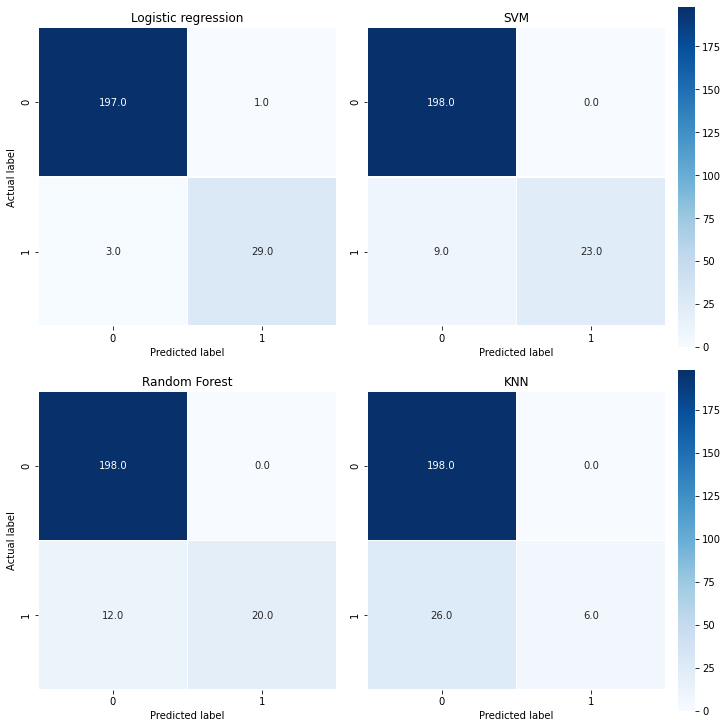

In [89]:
# Confusion matrix with Seaborn
#vmin = min(min(cm_lr), min(cm_svml), min(cm_svmp), min(cm_svmr), min(cm_nb), min(cm_knn))
vmaxl = max(max(cm_lr), max(cm_svm), max(cm_rf), max(cm_knn))
vmax =[float(i) for i in vmaxl]



fig, axs = plt.subplots(2,2, figsize = (10,10), constrained_layout=True)
sns.heatmap(ax=axs[0,0], data = cm_lr, annot=True, cbar=False, fmt='.1f', linewidths=.5, square = True, cmap = 'Blues');
axs[0,0].set_xlabel("Predicted label")
axs[0,0].set_ylabel("Actual label")
axs[0,0].set_title("Logistic regression")
sns.heatmap(ax=axs[0,1], vmax=vmax[0], data = cm_svm, cbar= True, annot=True, fmt='.1f', linewidths=.5, square = True, cmap = 'Blues');
axs[0,1].set_title("SVM")
axs[0,1].set_xlabel("Predicted label")
sns.heatmap(ax=axs[1,0], data = cm_rf, annot=True, cbar=False, fmt='.1f', linewidths=.5, square = True, cmap = 'Blues');
axs[1,0].set_xlabel("Predicted label")
axs[1,0].set_ylabel("Actual label")
axs[1,0].set_title("Random Forest")
sns.heatmap(ax=axs[1,1], data = cm_knn, annot=True, cbar=True, fmt='.1f', linewidths=.5, square = True, vmax=vmax[0], cmap = 'Blues');
axs[1,1].set_xlabel("Predicted label")
axs[1,1].set_title("KNN")
plt.savefig('confusion_matrix_clf.png')

#plt.ylabel('Actual label');
#plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(mean(score_logisticR))
#plt.title(all_sample_title, size = 15);

In [95]:
knn.score


<bound method ClassifierMixin.score of KNeighborsClassifier(n_neighbors=20)>

In [33]:
print(scaled_data)

StandardScaler()
